# Music Genre Classification

Let us start by importing the necessary modules.

In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Data Understanding and Cleaning


Now let us import the dataset for our music prediction. The dataset consists of differnet columns with tempo, beats per minues etc. Using that, we have to classify what type of music it is. Let us import the dataset and view first few rows of it.

In [2]:
df = pd.read_csv("data.csv")
df.head(10)

,filename,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues.00081.au,103.359375,50,0.380260,0.248262,2116.942959,1956.611056,4196.107960,0.127272,-26.929785,...,14.336612,-13.821769,7.562789,-6.181372,0.330165,-6.829571,0.965922,-7.570825,2.918987,blues
1,blues.00022.au,95.703125,44,0.306451,0.113475,1156.070496,1497.668176,2170.053545,0.058613,-233.860772,...,-2.250578,3.959198,5.322555,0.812028,-1.107202,-4.556555,-2.436490,3.316913,-0.608485,blues
2,blues.00031.au,151.999081,75,0.253487,0.151571,1331.073970,1973.643437,2900.174130,0.042967,-221.802549,...,-13.037723,-12.652228,-1.821905,-7.260097,-6.660252,-14.682694,-11.719264,-11.025216,-13.387260,blues
3,blues.00012.au,184.570312,91,0.269320,0.119072,1361.045467,1567.804596,2739.625101,0.069124,-207.208080,...,-0.613248,0.384877,2.605128,-5.188924,-9.527455,-9.244394,-2.848274,-1.418707,-5.932607,blues
4,blues.00056.au,161.499023,74,0.391059,0.137728,1811.076084,2052.332563,3927.809582,0.075480,-145.434568,...,7.457218,-10.470444,-2.360483,-6.783623,2.671134,-4.760879,-0.949005,0.024832,-2.005315,blues
5,blues.00058.au,107.666016,51,0.356588,0.162028,2068.371125,2033.930047,4231.499413,0.104372,-95.436027,...,10.262575,-9.438187,3.867535,-10.187453,3.588093,-3.100753,0.194597,0.842872,-3.416576,blues
6,blues.00066.au,161.499023,80,0.374710,0.110496,2340.432873,2256.538115,4972.503265,0.121775,-116.517402,...,10.998190,-13.861801,9.735367,-5.089488,2.634638,-9.883816,6.159059,-7.682608,-4.852479,blues
7,blues.00060.au,151.999081,74,0.430894,0.196222,1946.565652,1979.909934,3955.867746,0.097454,-67.770980,...,12.295832,-12.477988,1.681278,-5.142068,4.644002,-6.919217,1.040718,-4.736871,-0.660037,blues
8,blues.00025.au,92.285156,45,0.290948,0.089222,1109.569627,1463.288131,2243.569767,0.051725,-249.281996,...,-3.575065,-2.926915,4.598686,7.478115,-0.178770,-2.818857,-2.667636,0.751667,-0.533179,blues
9,blues.00014.au,151.999081,70,0.329163,0.066981,1172.065695,1705.817502,2344.952487,0.045046,-305.705187,...,1.298478,5.954478,8.543867,1.117664,0.591559,0.057474,-3.712342,-1.004448,-1.802434,blues


We can see that the dataset consists of 30 columns. Let us analyse each column one by one. The dataset consists of different audio samples named filename.au which consists of a 30 second sound of music of different genres. The music is then represented into numerical forms using Short Time Fourier Transform and Mel-Frequency Cepstrum and it's cofficients. The details of each columns of dataset is given below.

   1. <b>Filename </b>   : The filename of the audio clip that the data was extracted from. <br><br>
   2. <b>Tempo</b>       : The speed at which the music shounld be played. It is measured in Beats per Minute (BPM)<br><br>
   3. <b>Beats</b>       : The basic rhythmic unit of a measure. A whole note is defined as 4 beats.<br><br>
   4. <b>chroma_stft</b> : It is the audio chromagram (12 pitch notation) generated by using Short Time Fourier Transform. The                        idea is to combine all information about a specific chroma into a single coefficient for a certain                          local time window expressed in beats or seconds). <br><br>
   5. <b>RMSE</b>        : Root Mean Suqare ENERGY of the sound that we have. Energy of a audio signal simply means how much loud                      the sound is. Root mean square energy of a sound wave is simply root mean of the loudness of a sound. <br><br>
   6. <b>spectral_centroid</b>: It is the value where the main "MASS" of the audio is in it's spectrogram. <br>
   7. <b>spectral_bandwidth</b>: It is the variance from the spectral centroid
   8. <b>rolloff</b> : When the signal frequency goes away from the cut-off frequency (the frequency beyond which the                              filter will not pass signals), the signal level drops,  when cut-off rate is low.
   9. <b>zero_crossing_rate</b>: The rate at which a signal changes from positive to zero to negative or from negative to    zero to positive.
   10. <b>mfcc1-mfcc20</b>: The coefficient of the Mel-Frequency Cepstrum is here ranged from 1 to 20. The Mel-Frequency Cepstrum often is used to describe timbre of an audio.

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   filename            1000 non-null   object 
 1   tempo               1000 non-null   float64
 2   beats               1000 non-null   int64  
 3   chroma_stft         1000 non-null   float64
 4   rmse                1000 non-null   float64
 5   spectral_centroid   1000 non-null   float64
 6   spectral_bandwidth  1000 non-null   float64
 7   rolloff             1000 non-null   float64
 8   zero_crossing_rate  1000 non-null   float64
 9   mfcc1               1000 non-null   float64
 10  mfcc2               1000 non-null   float64
 11  mfcc3               1000 non-null   float64
 12  mfcc4               1000 non-null   float64
 13  mfcc5               1000 non-null   float64
 14  mfcc6               1000 non-null   float64
 15  mfcc7               1000 non-null   float64
 16  mfcc8  

We can see that there is a filename, which is of an object type. Let's remove this, since we are working on a numerical values and filename is not necessary.
#### Data Cleaning

In [4]:
df = df.iloc[:, 1:]
df.head()

,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,103.359375,50,0.380260,0.248262,2116.942959,1956.611056,4196.107960,0.127272,-26.929785,107.334008,...,14.336612,-13.821769,7.562789,-6.181372,0.330165,-6.829571,0.965922,-7.570825,2.918987,blues
1,95.703125,44,0.306451,0.113475,1156.070496,1497.668176,2170.053545,0.058613,-233.860772,136.170239,...,-2.250578,3.959198,5.322555,0.812028,-1.107202,-4.556555,-2.436490,3.316913,-0.608485,blues
2,151.999081,75,0.253487,0.151571,1331.073970,1973.643437,2900.174130,0.042967,-221.802549,110.843070,...,-13.037723,-12.652228,-1.821905,-7.260097,-6.660252,-14.682694,-11.719264,-11.025216,-13.387260,blues
3,184.570312,91,0.269320,0.119072,1361.045467,1567.804596,2739.625101,0.069124,-207.208080,132.799175,...,-0.613248,0.384877,2.605128,-5.188924,-9.527455,-9.244394,-2.848274,-1.418707,-5.932607,blues
4,161.499023,74,0.391059,0.137728,1811.076084,2052.332563,3927.809582,0.075480,-145.434568,102.829023,...,7.457218,-10.470444,-2.360483,-6.783623,2.671134,-4.760879,-0.949005,0.024832,-2.005315,blues


In [5]:
df['label'].value_counts()

hiphop       100
rock         100
blues        100
metal        100
classical    100
country      100
jazz         100
pop          100
disco        100
reggae       100
Name: label, dtype: int64

We check if there are any null values in the dataset.

In [6]:
print(pd.isnull(df).sum())

tempo                 0
beats                 0
chroma_stft           0
rmse                  0
spectral_centroid     0
spectral_bandwidth    0
rolloff               0
zero_crossing_rate    0
mfcc1                 0
mfcc2                 0
mfcc3                 0
mfcc4                 0
mfcc5                 0
mfcc6                 0
mfcc7                 0
mfcc8                 0
mfcc9                 0
mfcc10                0
mfcc11                0
mfcc12                0
mfcc13                0
mfcc14                0
mfcc15                0
mfcc16                0
mfcc17                0
mfcc18                0
mfcc19                0
mfcc20                0
label                 0
dtype: int64


# 2. Data Analysis and Visualization

 Statistical Analysis of our dataset.

In [7]:
df.describe(include = "all")

,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,hiphop
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100
mean,119.601702,57.138000,0.378656,0.130929,2201.834226,2242.559613,4571.702159,0.103637,-144.479173,99.552199,...,4.471604,-4.797232,1.781547,-3.870275,1.147988,-3.967431,0.507303,-2.328779,-1.094875,NaN
std,28.297367,14.225728,0.081689,0.065685,715.961347,526.337663,1574.770035,0.041834,100.235661,31.331904,...,6.717312,6.170919,5.009489,4.874423,4.579110,4.550650,3.869088,3.755574,3.837561,NaN
min,54.978391,18.000000,0.171782,0.005276,569.930721,897.994319,749.062137,0.021701,-552.064063,-1.527148,...,-15.805227,-27.542309,-12.598773,-17.545474,-15.693589,-17.227765,-11.975698,-18.504188,-19.935203,NaN
25%,99.384014,47.000000,0.319641,0.086625,1627.793931,1907.136505,3380.956639,0.070281,-200.695133,76.811480,...,-0.551576,-9.363372,-1.640080,-7.164838,-1.857098,-7.194297,-2.003979,-4.670281,-3.368000,NaN
50%,117.453835,56.000000,0.383075,0.122448,2209.468780,2221.408983,4658.671830,0.099539,-120.206072,98.452551,...,3.891842,-4.199810,1.879424,-3.614473,1.211944,-4.059109,0.669788,-2.391261,-1.155198,NaN
75%,135.999178,65.250000,0.435974,0.175793,2691.969702,2578.474352,5534.197785,0.132007,-73.895019,119.893638,...,9.706133,-0.161017,5.155264,-0.323536,4.350694,-0.842968,3.112518,0.149070,1.303739,NaN


## Barplots

It is done according to stardand deviation of the column. Either Columns with highest standard deviation or the lowest standardard deviation were chosen.

#### Genre according to Beats (Mediocre Std)

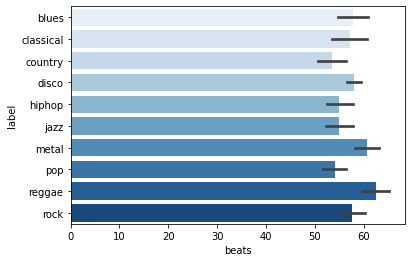

In [8]:
sns.barplot(x = "beats", y = "label", data = df, palette = "Blues")
plt.show()

#### Genre According to tempo (Mediocre Std)

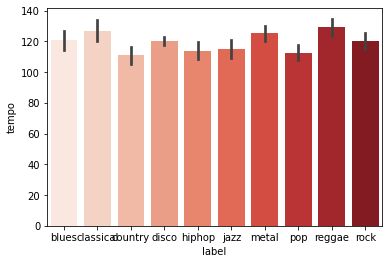

In [9]:
sns.barplot(x = "label", y = "tempo", data = df, palette = "Reds")
plt.show()

#### Genre According to Root Mean Square Energy (Low Std)

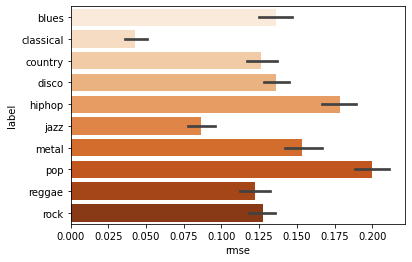

In [10]:
sns.barplot(x = "rmse", y = "label", data = df, palette = "Oranges")
plt.show()

#### Genre According to zero_crossing_rate (Lowest std)

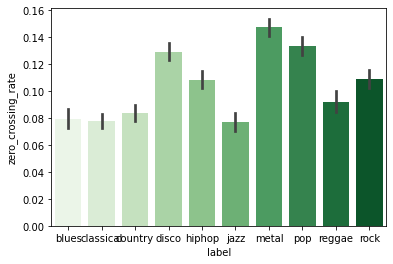

In [11]:
sns.barplot(x = "label", y = "zero_crossing_rate", data = df, palette = "Greens")
plt.show()

#### Genre According to Spectral Centroid (High Std)

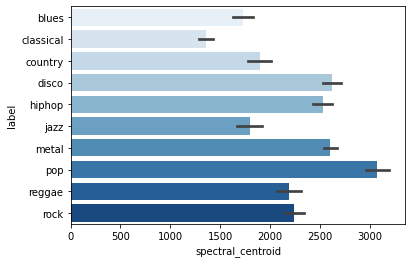

In [12]:
sns.barplot(x = "spectral_centroid", y = "label", data = df, palette = "Blues")
plt.show()

#### Genre According to Spectral Bandwidth (High Std)

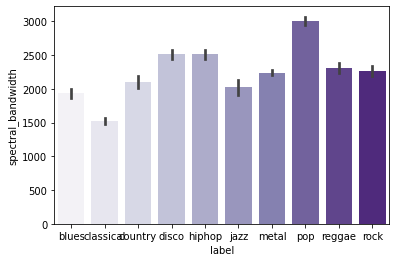

In [13]:
sns.barplot(x = "label", y = "spectral_bandwidth", data = df, palette = "Purples")
plt.show()

Here, we can see that each genre of music that we have, they have different values of our different columns in our dataset. The columns with highest Standard Deviation and the ones with the lowest Standard Deviation were the ones that could be visually viable to assume that each of these features are important, and a genre of music does depend on such columns. The columns with mediocre Standard Deviations' barplot did not have that difference in each other's classes compared to ones with high or low std but we can conclude that those columns also do have a significant impact on the genre of music that we are looking for.

### Now let's see how some features are distributed by genre.

In [14]:
labels = df['label'].unique()

#### Rolloff vs Genre (Look at Std, Mean and Min/Max)

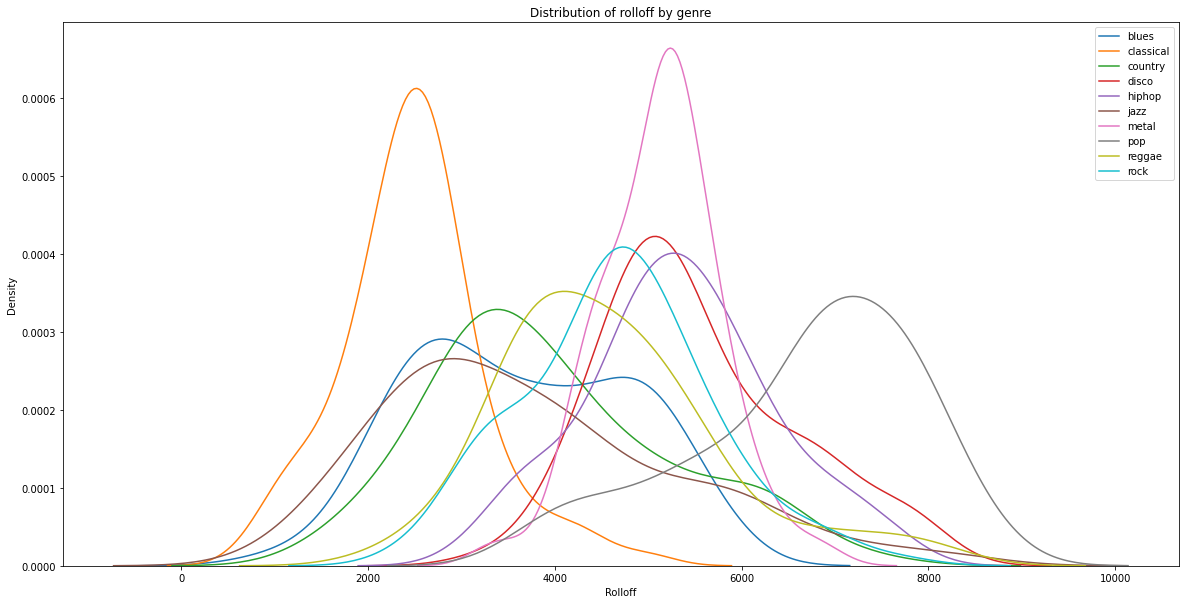

In [15]:
plt.figure(figsize=(20,10))
for label in labels:
    sns.kdeplot(data=df.loc[df['label']==label, 'rolloff'], label = label)

plt.title("Distribution of rolloff by genre")
plt.xlabel("Rolloff")
plt.legend()

#### MFCC1 vs Genre

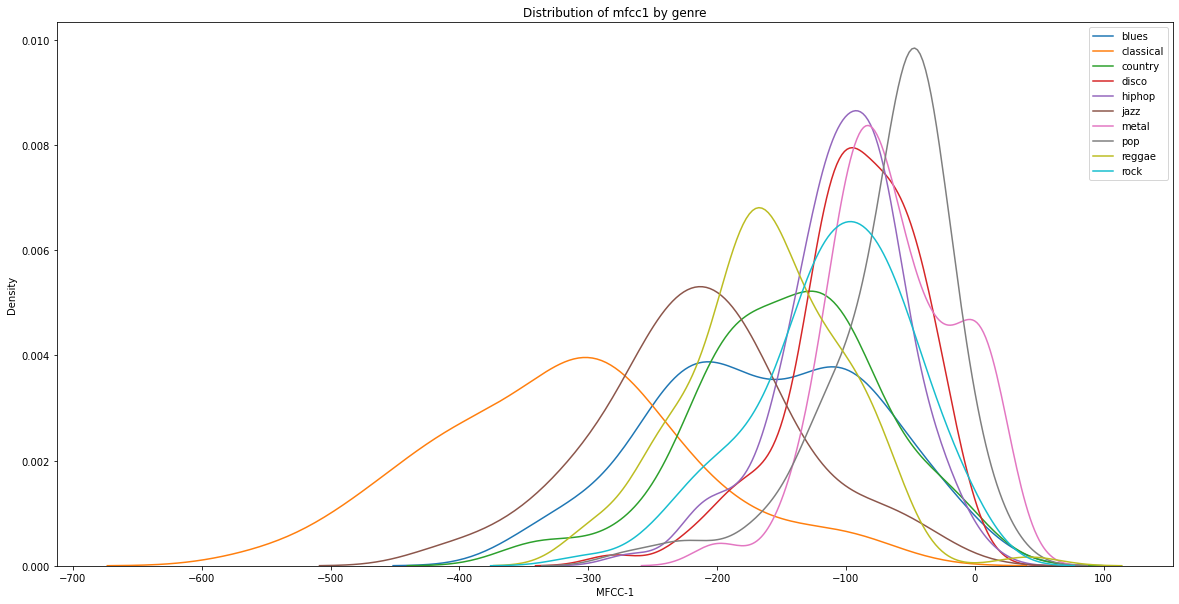

In [16]:
plt.figure(figsize=(20,10))
for label in labels:
    sns.kdeplot(data=df.loc[df['label']==label, 'mfcc1'], label = label)

plt.title("Distribution of mfcc1 by genre")
plt.xlabel("MFCC-1")
plt.legend()

#### MFCC20 vs Genre

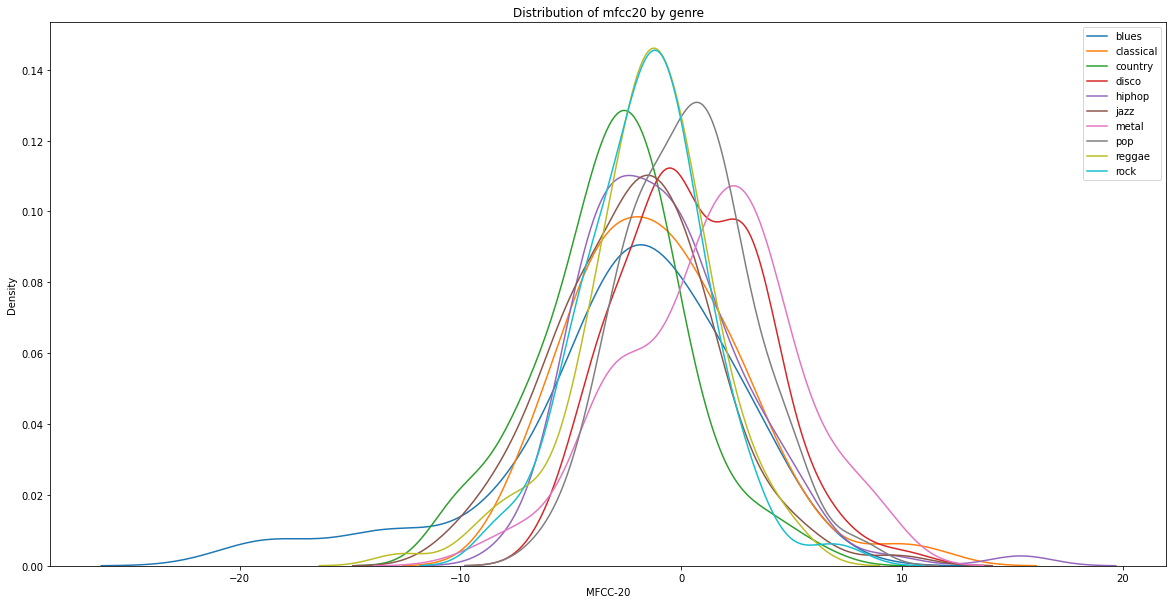

In [17]:
plt.figure(figsize=(20,10))
for label in labels:
    sns.kdeplot(data=df.loc[df['label']==label, 'mfcc20'], label = label)

plt.title("Distribution of mfcc20 by genre")
plt.xlabel("MFCC-20")
plt.legend()

#### MFCC19 vs Genre

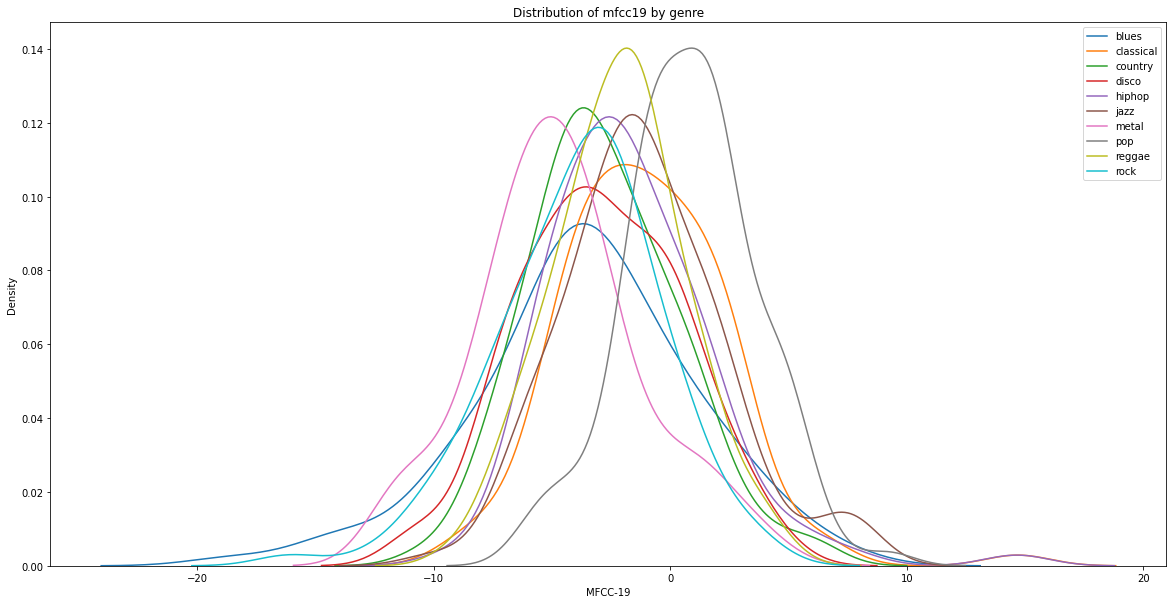

In [18]:
plt.figure(figsize=(20,10))
for label in labels:
    sns.kdeplot(data=df.loc[df['label']==label, 'mfcc19'], label = label)

plt.title("Distribution of mfcc19 by genre")
plt.xlabel("MFCC-19")
plt.legend()

We can predict that the mfcc 19 and 20 have a high co-relation. Since their plot looks similar.

# 3. Primary Model

We are here doing a classification task. For that we need to separate our X (Feature variable) and y (target variable). Let us first define that and then proceed further.

In [19]:
X = df.iloc[:, :-1]
X

,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,...,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
0,103.359375,50,0.380260,0.248262,2116.942959,1956.611056,4196.107960,0.127272,-26.929785,107.334008,...,-15.234050,14.336612,-13.821769,7.562789,-6.181372,0.330165,-6.829571,0.965922,-7.570825,2.918987
1,95.703125,44,0.306451,0.113475,1156.070496,1497.668176,2170.053545,0.058613,-233.860772,136.170239,...,5.145258,-2.250578,3.959198,5.322555,0.812028,-1.107202,-4.556555,-2.436490,3.316913,-0.608485
2,151.999081,75,0.253487,0.151571,1331.073970,1973.643437,2900.174130,0.042967,-221.802549,110.843070,...,-26.406674,-13.037723,-12.652228,-1.821905,-7.260097,-6.660252,-14.682694,-11.719264,-11.025216,-13.387260
3,184.570312,91,0.269320,0.119072,1361.045467,1567.804596,2739.625101,0.069124,-207.208080,132.799175,...,-2.452068,-0.613248,0.384877,2.605128,-5.188924,-9.527455,-9.244394,-2.848274,-1.418707,-5.932607
4,161.499023,74,0.391059,0.137728,1811.076084,2052.332563,3927.809582,0.075480,-145.434568,102.829023,...,-6.934599,7.457218,-10.470444,-2.360483,-6.783623,2.671134,-4.760879,-0.949005,0.024832,-2.005315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,123.046875,59,0.418812,0.166056,2312.030070,2060.825761,4528.197619,0.140588,-41.402023,105.403012,...,-15.174259,11.303100,-14.155566,2.824157,-9.477822,3.331261,-8.200088,3.693091,-3.673562,-0.163201
996,117.453835,56,0.335774,0.093676,2553.856706,2219.090892,5123.752351,0.136173,-121.410791,89.522283,...,-16.957086,9.149520,-10.112054,4.211237,-9.349345,1.609701,-10.553566,1.066489,-1.654875,7.544224
997,103.359375,45,0.372834,0.208743,1345.850763,1841.748033,2939.265560,0.041099,-127.946876,134.443879,...,-6.700004,11.043714,-8.385375,2.111019,-6.338260,0.997383,-5.325869,-0.842192,-4.665996,-4.787677
998,112.347147,45,0.344472,0.180163,1675.475369,1653.422860,3253.563659,0.087294,-98.356322,136.611573,...,-12.647550,2.945863,-12.509212,0.091337,-0.774780,-5.700102,-8.630916,-1.903803,-2.196753,-3.395148


In [20]:
y = df['label']
y.unique()

array(['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz',
       'metal', 'pop', 'reggae', 'rock'], dtype=object)

Here, the genres are given in string. Let's one hot encode them to a numerical value.

In [21]:
labeling = np.arange(len(y.unique()))
encoded_genres = dict(zip(labels, labeling ))
print(encoded_genres)

{'blues': 0, 'classical': 1, 'country': 2, 'disco': 3, 'hiphop': 4, 'jazz': 5, 'metal': 6, 'pop': 7, 'reggae': 8, 'rock': 9}


Now let's add them to our dataset.

In [22]:
y = df.iloc[:, -1:]
y['label'] = y['label'].map(encoded_genres)
y['label'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [23]:
y

,label
0,0
1,0
2,0
3,0
4,0
...,...
995,9
996,9
997,9
998,9


Now let's split the dataset into training and validation

In [24]:
from sklearn.model_selection import train_test_split

# we first separate it into testing data and training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

## Building Models

### Logistic Regression Model

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train, y_train.values.ravel())
y_pred_logreg = logreg.predict(X_test)
acc_logreg = accuracy_score(y_pred_logreg, y_test)*100

print(acc_logreg)

49.5


### Random Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest.fit(X_train, y_train.values.ravel())
y_pred_rfc = randomforest.predict(X_test)
acc_randomforest = accuracy_score(y_pred_rfc, y_test) * 100
print(acc_randomforest)

62.5


### K-Nearest Neighbors

In [27]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train.values.ravel())
y_pred_knn = knn.predict(X_test)
acc_knn = accuracy_score(y_pred_knn, y_test) * 100
print(acc_knn)

34.0


# 4. Cross Validation and Hyper-Parameter Tuning

In [28]:
#Let's import the necessary modules

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

### For Logistic Regression

The hyperparameters for logistic regression are the type of solver to use, the penalty for our model l1 or l2, and the penalty strength (c value)

In [29]:
#Let's initialize them first
solvers = ['lbfgs', 'liblinear']
penalty = ['l1', 'l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
logistic_grid = dict(solver=solvers,penalty=penalty,C=c_values)


log_mod = LogisticRegression()


log_cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
log_grid_search = GridSearchCV(estimator=log_mod, verbose=0, param_grid=logistic_grid, n_jobs=-1, cv=log_cv, scoring='accuracy',error_score=0)
log_grid_result = log_grid_search.fit(X_train, y_train.values.ravel())

print("Best: %f using %s" % (log_grid_result.best_score_, log_grid_result.best_params_))

Best: 0.610417 using {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}


c:\users\saumy\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


### For K-Nearest Neighbor Classifier

The hyperparameters for KNN are the total number of neighbors, the distance metrics and the weights. 
The <b>Weight</b> metric defines that all the k-nearest-neighbors have either equal weightage on them or they have some weight attatched to them based on their distance.  

In [30]:
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']
knn_grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)


knn_mod = KNeighborsClassifier()


knn_cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
knn_grid_search = GridSearchCV(estimator=knn_mod, param_grid=knn_grid, n_jobs=-1, cv=knn_cv, scoring='accuracy',error_score=0)
knn_grid_result = knn_grid_search.fit(X_train, y_train.values.ravel())


print("Best: %f using %s" % (knn_grid_result.best_score_, knn_grid_result.best_params_))

Best: 0.415833 using {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}


### For Random Forest Classifier

Here, the hyperparameters that we have to learn are, whether we need to bootstrap or not. The maximum depth of each tree in the random forest, the maximum features <b>(number of random features to sample at each point)</b> that we use and the numbers of estimators <b>number of trees to use</b>

In [31]:
n_estimators = [10, 100, 1000, 1500]
max_features = ['sqrt', 'log2']
bootstrap    = [True, False]
max_depth    = [5,10,None]
criteriation = ['gini', 'ID3']
rfc_grid = dict(n_estimators=n_estimators,max_features=max_features)


rfc_model = RandomForestClassifier()


rfc_cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
rfc_grid_search = GridSearchCV(estimator=rfc_model, param_grid=rfc_grid, n_jobs=-1, cv=rfc_cv, scoring='accuracy',error_score=0)
rfc_grid_result = rfc_grid_search.fit(X_train, y_train.values.ravel())
# summarize results
print("Best: %f using %s" % (rfc_grid_result.best_score_, rfc_grid_result.best_params_))

Best: 0.631250 using {'max_features': 'sqrt', 'n_estimators': 100}


# 5. Feature Selection

For selecting features, we apply a manual technique of finding out the <b>co-relation</b> of the dataset. We then drop those features which are highly co-rrelated with each other, setting the <b>Threshold Value of 0.9</b>. It we emit those out because those two features are highly co-related with each other, so they basically cause nearly similar effect to determine the output.

In [32]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tempo               1000 non-null   float64
 1   beats               1000 non-null   int64  
 2   chroma_stft         1000 non-null   float64
 3   rmse                1000 non-null   float64
 4   spectral_centroid   1000 non-null   float64
 5   spectral_bandwidth  1000 non-null   float64
 6   rolloff             1000 non-null   float64
 7   zero_crossing_rate  1000 non-null   float64
 8   mfcc1               1000 non-null   float64
 9   mfcc2               1000 non-null   float64
 10  mfcc3               1000 non-null   float64
 11  mfcc4               1000 non-null   float64
 12  mfcc5               1000 non-null   float64
 13  mfcc6               1000 non-null   float64
 14  mfcc7               1000 non-null   float64
 15  mfcc8               1000 non-null   float64
 16  mfcc9  

In [33]:
features_corr = X.corr()
features_corr

,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,...,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
tempo,1.000000,0.966179,0.030640,-0.043503,-0.014415,-0.039283,-0.020564,0.019935,0.011271,0.007200,...,-0.078778,-0.028215,-0.045415,0.010452,-0.055127,0.024411,-0.076208,-0.010242,-0.061399,-0.027405
beats,0.966179,1.000000,0.080684,0.004607,0.035843,0.011287,0.033489,0.056517,0.082156,-0.041055,...,-0.075456,0.015129,-0.052768,0.050075,-0.063695,0.044109,-0.093770,0.006229,-0.078372,-0.027907
chroma_stft,0.030640,0.080684,1.000000,0.499577,0.615524,0.517482,0.597910,0.554735,0.659294,-0.598495,...,0.072668,0.516620,-0.081725,0.417161,-0.143455,0.332396,-0.163450,0.269791,-0.089906,0.281775
rmse,-0.043503,0.004607,0.499577,1.000000,0.509984,0.529768,0.537718,0.332119,0.807260,-0.483765,...,0.117410,0.183310,0.012818,0.163065,-0.011243,0.083827,-0.029601,0.118253,0.031517,0.124827
spectral_centroid,-0.014415,0.035843,0.615524,0.509984,1.000000,0.904438,0.979633,0.874755,0.720831,-0.940171,...,0.152749,0.174946,0.051260,0.170689,0.022393,0.153678,0.027403,0.228048,0.027761,0.269598
spectral_bandwidth,-0.039283,0.011287,0.517482,0.529768,0.904438,1.000000,0.956194,0.612325,0.648373,-0.896660,...,0.289572,0.038078,0.205272,0.054740,0.127649,0.027062,0.104914,0.114624,0.098151,0.187932
rolloff,-0.020564,0.033489,0.597910,0.537718,0.979633,0.956194,1.000000,0.779809,0.721746,-0.934305,...,0.173940,0.162827,0.081738,0.158572,0.032146,0.132326,0.039624,0.205010,0.048121,0.256644
zero_crossing_rate,0.019935,0.056517,0.554735,0.332119,0.874755,0.612325,0.779809,1.000000,0.634139,-0.760127,...,-0.044591,0.263046,-0.142050,0.240698,-0.107069,0.249474,-0.076885,0.297152,-0.074580,0.305031
mfcc1,0.011271,0.082156,0.659294,0.807260,0.720831,0.648373,0.721746,0.634139,1.000000,-0.638911,...,-0.027021,0.331619,-0.171697,0.252206,-0.200787,0.185659,-0.208503,0.199769,-0.121578,0.195352
mfcc2,0.007200,-0.041055,-0.598495,-0.483765,-0.940171,-0.896660,-0.934305,-0.760127,-0.638911,1.000000,...,-0.203910,-0.176990,-0.110567,-0.195790,-0.064465,-0.160305,-0.051064,-0.202594,-0.027793,-0.238651


<AxesSubplot:>

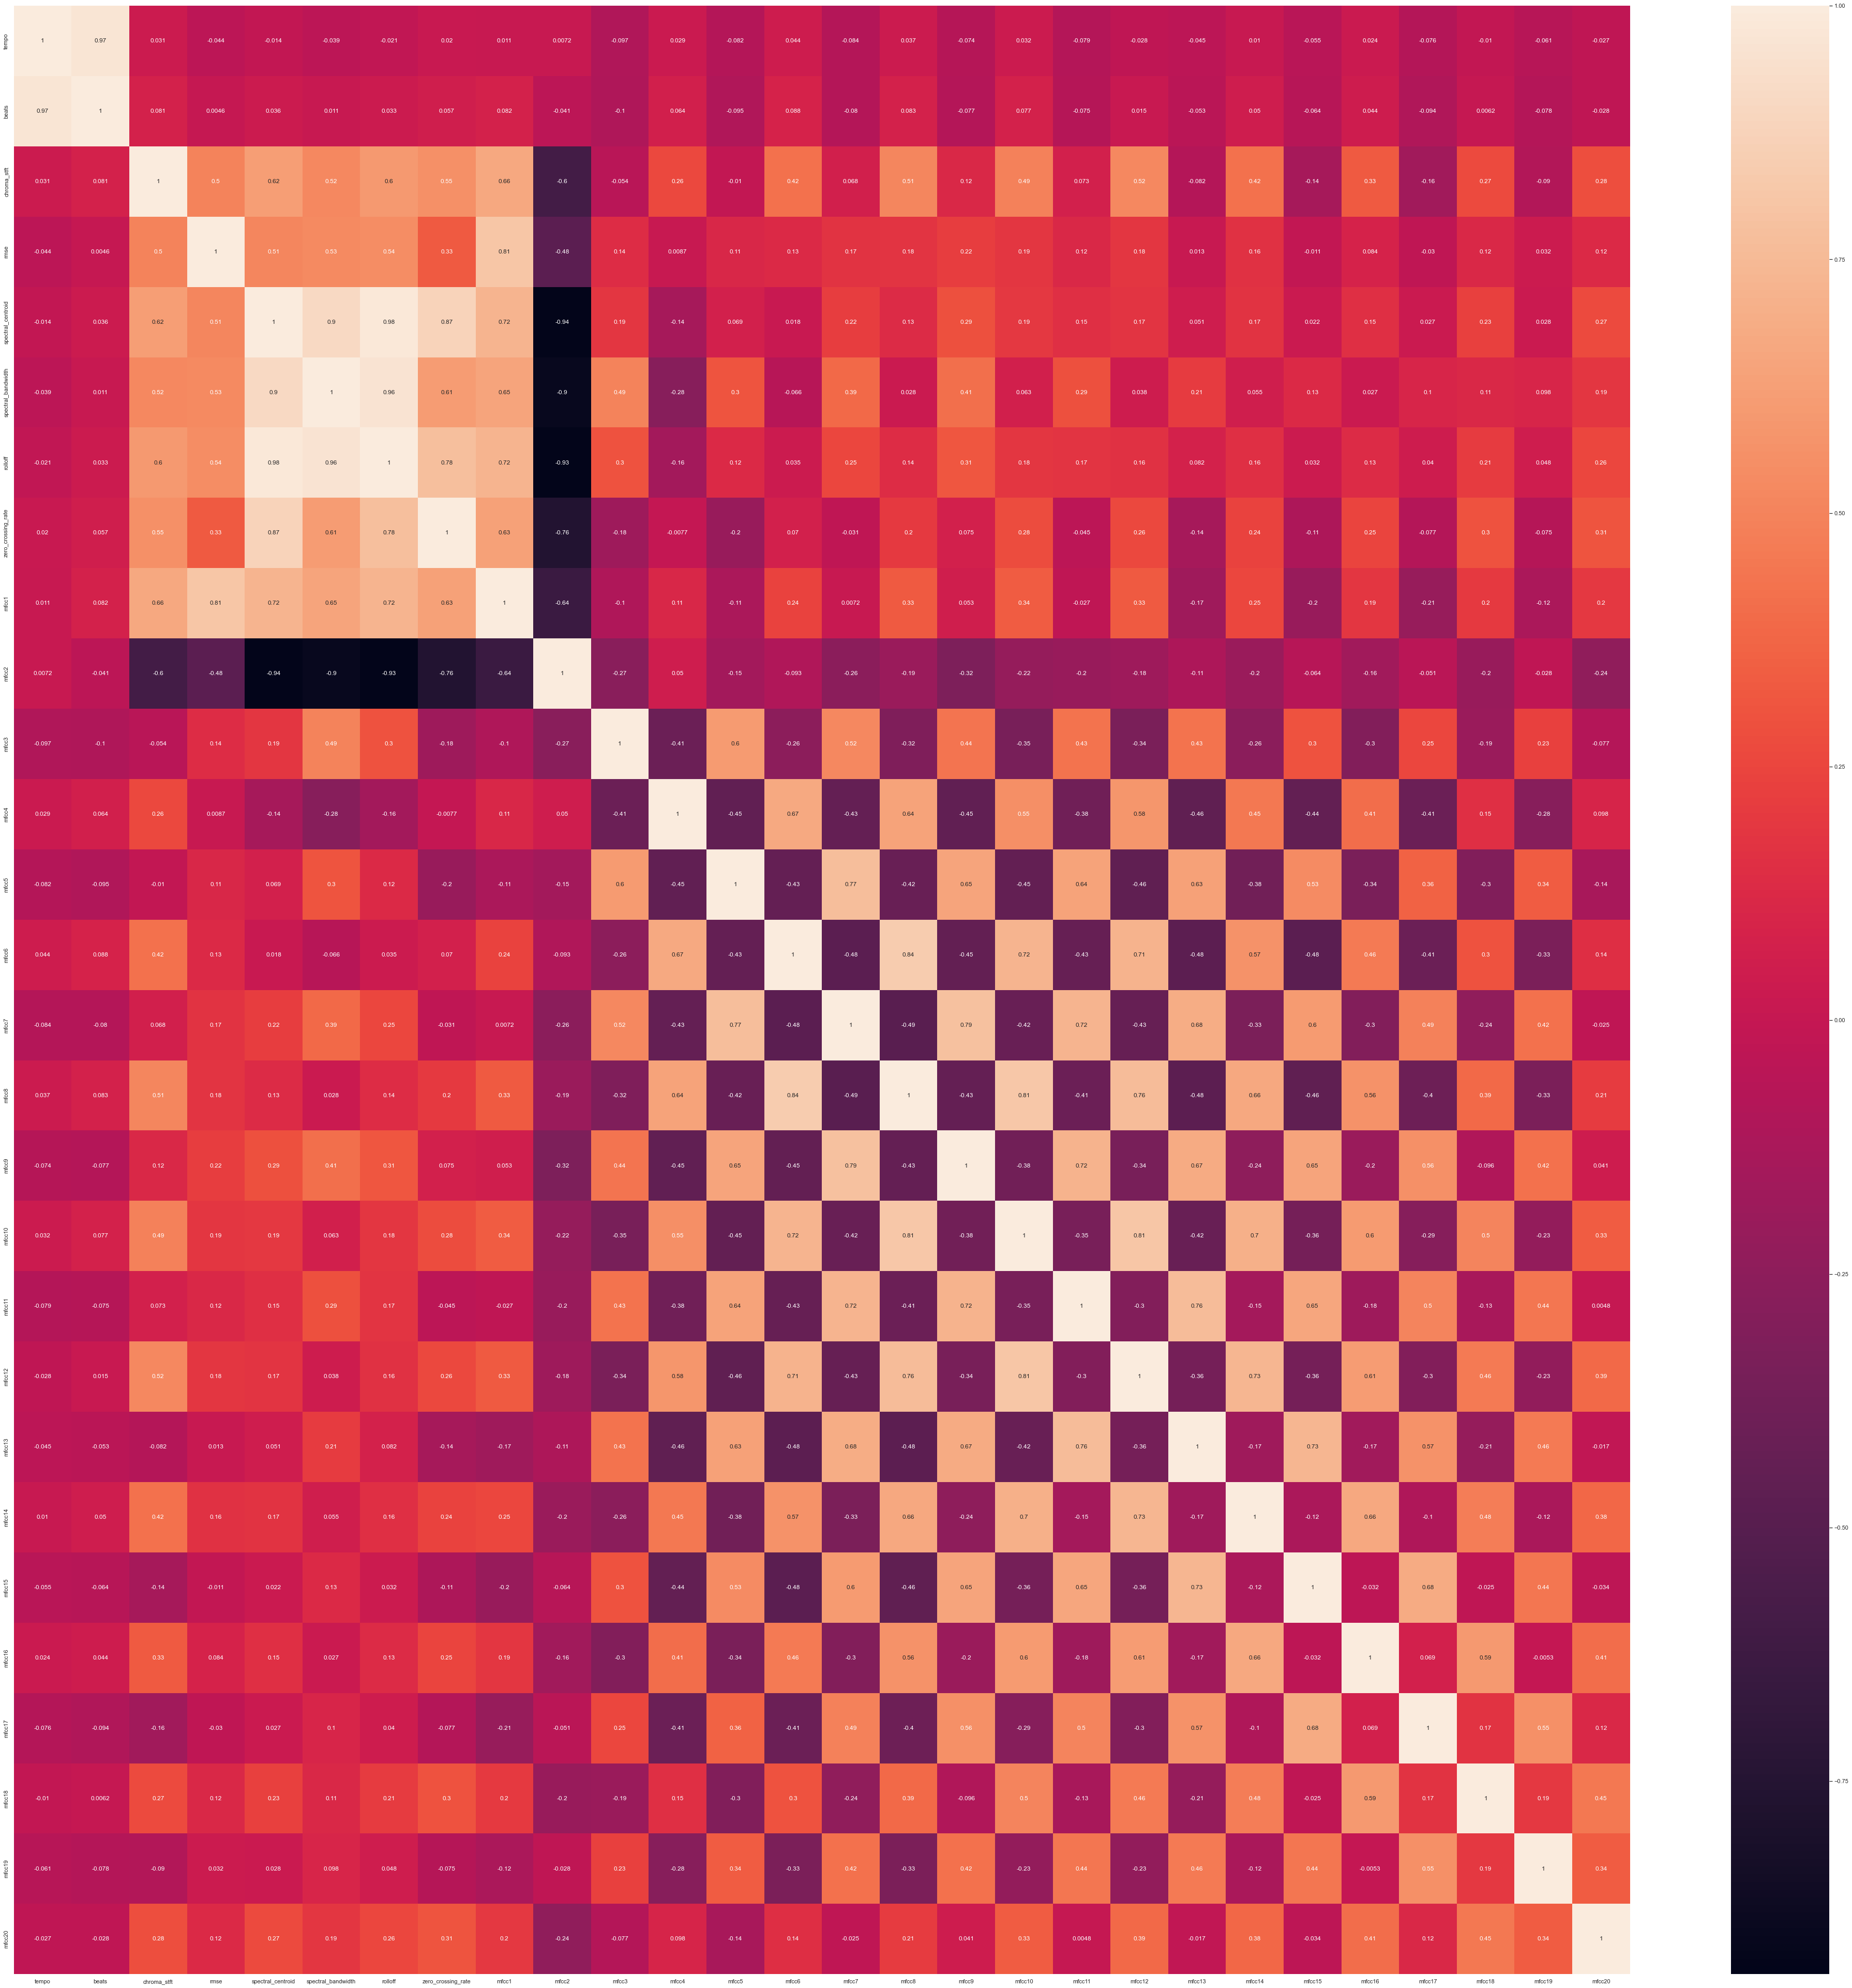

In [34]:
import seaborn as sns
sns.set(rc={'figure.figsize':(70, 70)})
sns.heatmap(features_corr, annot=True)

In [35]:
threshold = 0.9
coloumns = [True]*len(X.columns)
for i in range(features_corr.shape[0]):
  for j in range(i+1, features_corr.shape[0]):
    if features_corr.iloc[i,j] >= threshold:
      if coloumns[j]:
        coloumns[j] = False
selected_coloumns = X.columns[coloumns]
selected_coloumns
features_selected = X[selected_coloumns]

features_selected

,tempo,chroma_stft,rmse,spectral_centroid,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,...,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
0,103.359375,0.380260,0.248262,2116.942959,0.127272,-26.929785,107.334008,-46.809993,40.932634,-21.463776,...,-15.234050,14.336612,-13.821769,7.562789,-6.181372,0.330165,-6.829571,0.965922,-7.570825,2.918987
1,95.703125,0.306451,0.113475,1156.070496,0.058613,-233.860772,136.170239,3.289490,48.931193,8.699106,...,5.145258,-2.250578,3.959198,5.322555,0.812028,-1.107202,-4.556555,-2.436490,3.316913,-0.608485
2,151.999081,0.253487,0.151571,1331.073970,0.042967,-221.802549,110.843070,18.620984,30.922996,3.291330,...,-26.406674,-13.037723,-12.652228,-1.821905,-7.260097,-6.660252,-14.682694,-11.719264,-11.025216,-13.387260
3,184.570312,0.269320,0.119072,1361.045467,0.069124,-207.208080,132.799175,-15.438986,60.986727,0.725807,...,-2.452068,-0.613248,0.384877,2.605128,-5.188924,-9.527455,-9.244394,-2.848274,-1.418707,-5.932607
4,161.499023,0.391059,0.137728,1811.076084,0.075480,-145.434568,102.829023,-12.517677,56.993472,2.271347,...,-6.934599,7.457218,-10.470444,-2.360483,-6.783623,2.671134,-4.760879,-0.949005,0.024832,-2.005315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,123.046875,0.418812,0.166056,2312.030070,0.140588,-41.402023,105.403012,-43.945538,54.100395,-18.411090,...,-15.174259,11.303100,-14.155566,2.824157,-9.477822,3.331261,-8.200088,3.693091,-3.673562,-0.163201
996,117.453835,0.335774,0.093676,2553.856706,0.136173,-121.410791,89.522283,-33.497073,41.974745,-25.936361,...,-16.957086,9.149520,-10.112054,4.211237,-9.349345,1.609701,-10.553566,1.066489,-1.654875,7.544224
997,103.359375,0.372834,0.208743,1345.850763,0.041099,-127.946876,134.443879,1.027332,54.440979,-0.464906,...,-6.700004,11.043714,-8.385375,2.111019,-6.338260,0.997383,-5.325869,-0.842192,-4.665996,-4.787677
998,112.347147,0.344472,0.180163,1675.475369,0.087294,-98.356322,136.611573,-46.700574,46.457300,-17.135585,...,-12.647550,2.945863,-12.509212,0.091337,-0.774780,-5.700102,-8.630916,-1.903803,-2.196753,-3.395148


In [36]:
features_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tempo               1000 non-null   float64
 1   chroma_stft         1000 non-null   float64
 2   rmse                1000 non-null   float64
 3   spectral_centroid   1000 non-null   float64
 4   zero_crossing_rate  1000 non-null   float64
 5   mfcc1               1000 non-null   float64
 6   mfcc2               1000 non-null   float64
 7   mfcc3               1000 non-null   float64
 8   mfcc4               1000 non-null   float64
 9   mfcc5               1000 non-null   float64
 10  mfcc6               1000 non-null   float64
 11  mfcc7               1000 non-null   float64
 12  mfcc8               1000 non-null   float64
 13  mfcc9               1000 non-null   float64
 14  mfcc10              1000 non-null   float64
 15  mfcc11              1000 non-null   float64
 16  mfcc12 

#### We can see that the 3 features have been dropped. 

Let us vew the heatmap again. There should be less number of whiter regions in it now.

<AxesSubplot:>

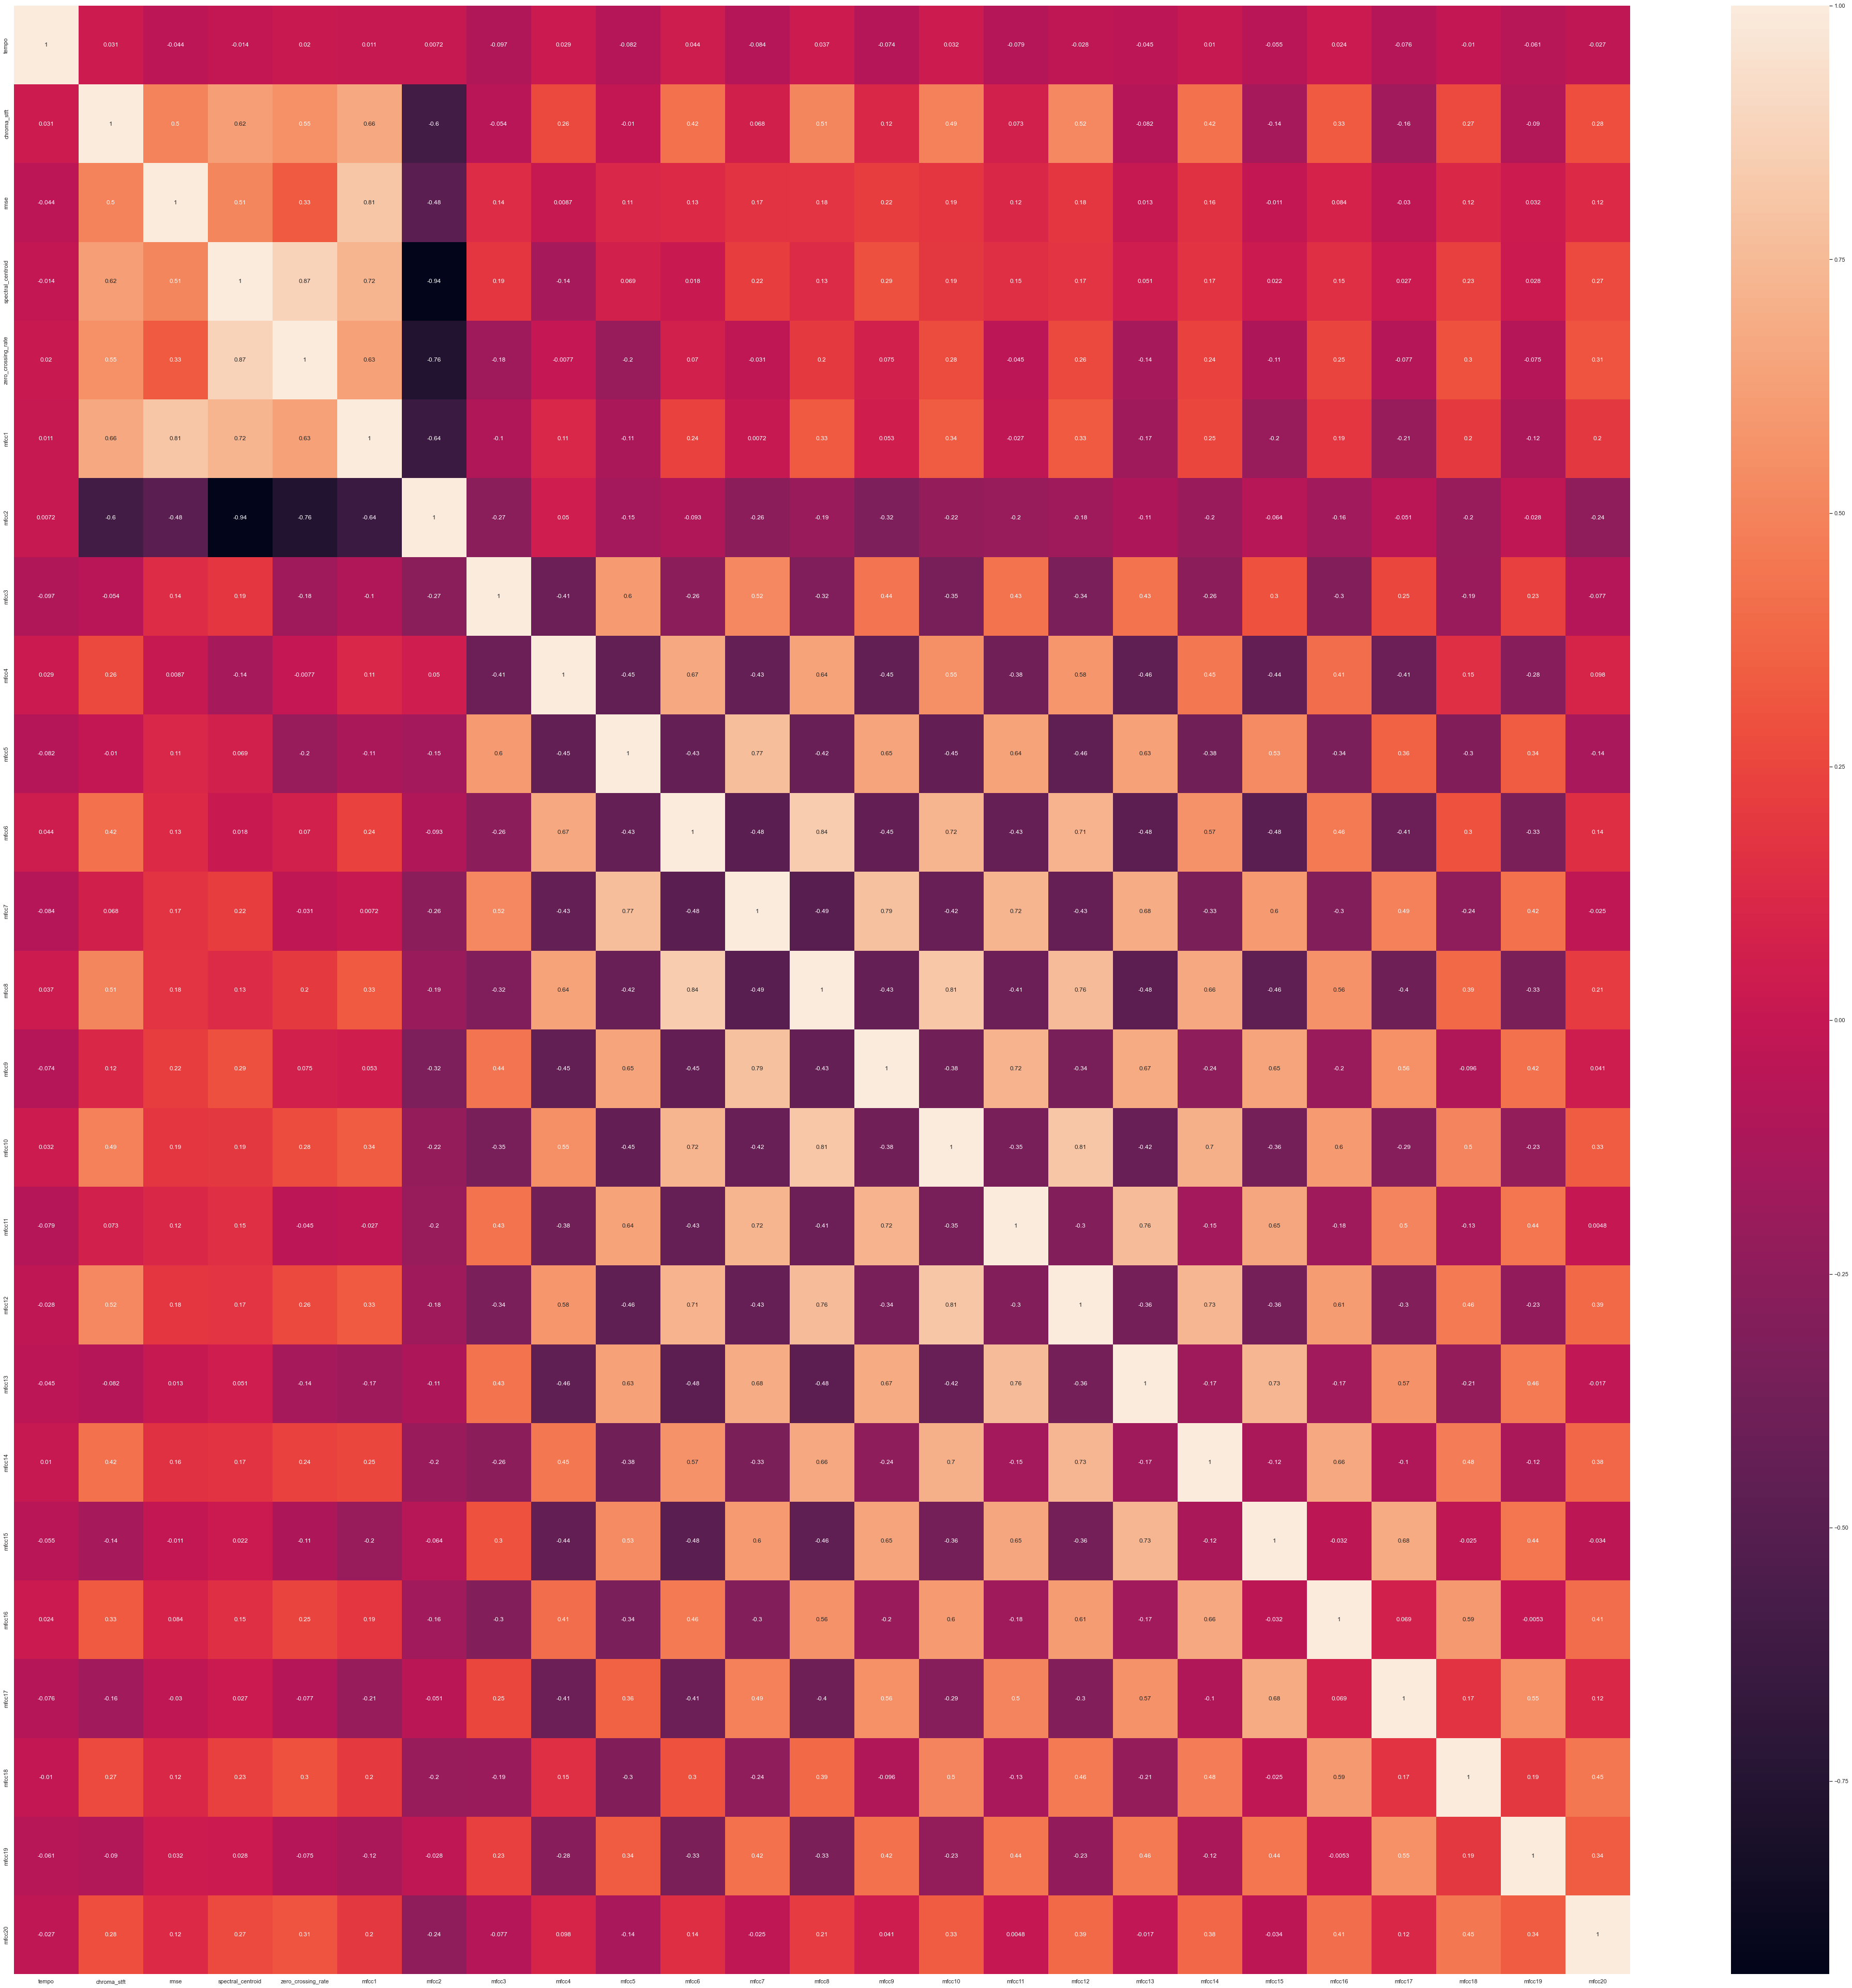

In [37]:
new_features_corr = features_selected.corr()
sns.heatmap(new_features_corr, annot=True)

# 6. Final Model 

### Updating our train, test set with the new freshly selected feature variables.

In [38]:
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(features_selected, y, test_size=0.20, random_state=42)
X_test.head(10)

,tempo,chroma_stft,rmse,spectral_centroid,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,...,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
521,123.046875,0.392974,0.051659,2874.646194,0.118338,-178.064125,61.944719,1.467996,36.044768,7.581289,...,5.169692,2.025911,0.510262,6.527839,2.604580,4.857150,7.935830,4.531667,-1.605698,3.730919
737,112.347147,0.433487,0.215937,3150.247439,0.127355,-45.055029,69.765294,11.874173,8.199662,12.614831,...,3.857668,-0.837510,2.121588,1.126969,0.007490,0.762866,-1.476882,3.654368,4.453744,4.202002
740,103.359375,0.352268,0.190992,3587.403428,0.146478,-47.028424,55.779344,27.619311,19.197857,15.188835,...,-1.583768,-3.003377,-7.637130,-3.844120,-8.116399,-3.369991,-2.270280,4.505538,1.437673,-0.385947
660,117.453835,0.456040,0.097612,2269.141394,0.137381,-100.400221,104.691589,-57.258439,56.592108,-5.540048,...,-13.764607,9.963104,-14.849633,0.346066,-7.327095,6.979448,-12.664924,-0.557887,-11.755469,-1.539930
411,95.703125,0.449395,0.247183,3236.163102,0.109357,-76.620463,52.771495,34.636140,26.188982,16.667570,...,3.874737,4.484008,0.630945,5.429071,4.193201,0.815080,1.633873,0.695423,-2.806931,-3.410054
678,103.359375,0.440988,0.151973,2646.947344,0.157781,-46.599231,86.818388,-34.781354,49.911859,-18.189561,...,-18.187376,12.451695,-13.558159,4.675014,-11.677201,5.325623,-13.554408,1.375529,-4.732566,-3.124152
626,151.999081,0.552581,0.077593,2877.354754,0.185308,-117.892265,65.442879,-51.438125,74.110855,-13.760048,...,-7.800714,12.351592,-14.449460,5.789589,-13.262164,4.566774,-11.395903,-0.664418,-4.569067,-0.214438
513,83.354335,0.269472,0.045310,2152.031384,0.081703,-215.370551,100.960496,17.097801,12.972428,16.057961,...,-4.927905,-3.350412,-1.427630,-5.027355,-0.666036,1.351335,1.997636,-0.251254,0.964303,-2.125205
859,151.999081,0.476249,0.080634,3002.851704,0.186434,-155.655322,57.025557,-35.260573,33.290323,-14.192080,...,2.827187,2.577846,2.829551,3.620648,-2.867771,-7.498871,0.190955,-1.460981,-2.174671,-0.057079
136,95.703125,0.319468,0.175421,1712.446076,0.116278,-106.191796,127.373625,-45.291436,31.271674,4.311937,...,2.990505,17.461090,-4.073548,1.781773,0.598687,4.610258,-9.984092,-3.343489,-3.099767,1.911288


## Logistic Regression

In [39]:
#filling in the hyper parameters
logreg_final = LogisticRegression(C=100, penalty='l2', solver='liblinear')

logreg_final.fit(X_train, y_train.values.ravel())
y_pred_logreg_final = logreg_final.predict(X_test)

print(f"{classification_report(y_pred_logreg_final, y_test)}")

              precision    recall  f1-score   support

           0       0.30      0.33      0.32        18
           1       1.00      0.65      0.79        20
           2       0.56      0.54      0.55        28
           3       0.33      0.50      0.40        14
           4       0.40      0.38      0.39        16
           5       0.55      0.67      0.60        18
           6       0.80      0.74      0.77        27
           7       0.92      0.57      0.71        21
           8       0.61      0.58      0.60        24
           9       0.19      0.29      0.23        14

    accuracy                           0.55       200
   macro avg       0.57      0.52      0.53       200
weighted avg       0.60      0.55      0.56       200



In [40]:
#filling in the hyper parameters
randomforest_final = RandomForestClassifier(n_estimators=2000, max_features='sqrt')

randomforest_final.fit(X_train, y_train.values.ravel())
y_pred_rfc_final = randomforest_final.predict(X_test)

# acc_randomforest = accuracy_score(y_pred_rfc, y_test) * 100
print(f"{classification_report(y_pred_rfc_final, y_test)}")

              precision    recall  f1-score   support

           0       0.70      0.74      0.72        19
           1       1.00      0.68      0.81        19
           2       0.56      0.52      0.54        29
           3       0.38      0.62      0.47        13
           4       0.53      0.36      0.43        22
           5       0.68      0.68      0.68        22
           6       0.88      0.76      0.81        29
           7       0.85      0.65      0.73        17
           8       0.39      0.50      0.44        18
           9       0.24      0.42      0.30        12

    accuracy                           0.60       200
   macro avg       0.62      0.59      0.59       200
weighted avg       0.65      0.60      0.61       200



In [41]:
#filling in the hyper parameters
knn_final = KNeighborsClassifier(metric='manhattan', n_neighbors=5, weights='distance')

knn_final.fit(X_train, y_train.values.ravel())
y_pred_knn_final = knn_final.predict(X_test)

print( f"{classification_report(y_pred_knn_final, y_test)}")

              precision    recall  f1-score   support

           0       0.30      0.35      0.32        17
           1       0.77      0.59      0.67        17
           2       0.30      0.31      0.30        26
           3       0.29      0.32      0.30        19
           4       0.40      0.33      0.36        18
           5       0.41      0.47      0.44        19
           6       0.64      0.57      0.60        28
           7       0.77      0.53      0.62        19
           8       0.26      0.35      0.30        17
           9       0.19      0.20      0.20        20

    accuracy                           0.41       200
   macro avg       0.43      0.40      0.41       200
weighted avg       0.44      0.41      0.42       200



# 7. Conclusion

Yes, the technique of Hyperparameter optimization and Feature Selection did increase the accuracy of my model.

### Before Hyperparameter optimation and Feature Selection
 #### Accuracy for:
   1. <b>Logistic Regression : </b> 49
   2. <b>K-Nearest Neighbor : </b> 34
   3. <b>Random Forest Classifier : </b> 67
   
### After Hyperparameter optimation and Feature Selection
 #### Accuracy for:
   1. <b>Logistic Regression : </b> 55
   2. <b>K-Nearest Neighbor : </b> 41
   3. <b>Random Forest Classifier : </b> 61